# Telecom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import skew, kurtosis
from imblearn.over_sampling import SMOTE

import mlflow
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from statsmodels.api import Logit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pickle

from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings("ignore")
start_time = datetime.now()

c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/cor

In [2]:
ROOT_PATH = Path(__name__).resolve().parent.parent

FILE_NAME = "TelecomCustomerChurn.csv"

FILE_PATH = os.path.join(ROOT_PATH, "data",FILE_NAME)

In [3]:
df = pd.read_csv(FILE_PATH)
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [4]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
df["TotalCharges"] = df["TotalCharges"].apply(
    lambda x: None if x == " " else float(x)
)

In [86]:
df.isnull().sum()

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [87]:
amount_of_nulls = df["TotalCharges"].isna().sum()
amount_of_data = len(df)

print(f"{(amount_of_nulls / amount_of_data) * 100} %")

0.1561834445548772 %


Since this amount of NaN values represents only 0.15% of the data, we can take it out because it won't make a big impact on our analysis

In [88]:
df = df.loc[~df["TotalCharges"].isna()]

In [89]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.60,Yes


#### Evaluating the Gender acitivity

In [90]:
df_gender_churn = df.groupby(
    ["Gender", "Churn"]
    ).agg({"Churn":"count"}).rename(
        columns={"Churn": "churn_count"}
    ).reset_index()

df_gender_churn = df_gender_churn.pivot_table(
    index="Gender", values="churn_count", columns="Churn"
)

df_gender_churn

Churn,No,Yes
Gender,,
Female,2544.0,939.0
Male,2619.0,930.0


Just evalue if there is a statistical relevance on Male and Female churns

Applying a Statistical teste called: Chi-Squared 

In [91]:
def statistical_chisquared(p_value: float):
    if p_value <= 0.05:
        print(f"There is a relevant difference between these genres. \np_value: {p_value}")
    else:
        print(f"There is no relevant difference between these genres. \np_value: {p_value}")

In [92]:
chi2, p, dof, expected = chi2_contingency(df_gender_churn)
statistical_chisquared(p)

There is no relevant difference between these genres. 
p_value: 0.490488470706551


In [93]:
df["Gender"].value_counts()

Gender
Male      3549
Female    3483
Name: count, dtype: int64

In [94]:
df.groupby(
    ["Gender"]
    ).agg({"TotalCharges":"sum"}).rename(
        columns={"TotalCharges": "TotalCharges_sum"}
    ).reset_index()

,Gender,TotalCharges_sum
0,Female,7952354.2
1,Male,8103814.5


#### Evaluating type of service

In [95]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [96]:
df_internet_service = df.groupby(
    ["InternetService", "Churn"]
    ).agg({"Churn":"count"}).rename(
        columns={"Churn": "churn_count"}
    ).reset_index()

df_internet_service = df_internet_service.pivot_table(
    index="InternetService", values="churn_count", columns="Churn"
)

df_internet_service["total"] = df_internet_service["No"] + df_internet_service["Yes"]

df_internet_service["churn_percent_service_categ"] = (df_internet_service["Yes"] / df_internet_service["total"]) * 100
df_internet_service["churn_percent_global"] = (df_internet_service["total"] / df_internet_service["total"].sum()) * 100

df_internet_service

Churn,No,Yes,total,churn_percent_service_categ,churn_percent_global
InternetService,,,,,
DSL,1957.0,459.0,2416.0,18.998344,34.357224
Fiber optic,1799.0,1297.0,3096.0,41.892765,44.027304
No,1407.0,113.0,1520.0,7.434211,21.615472


The Fiber Optic Internet represents 44% of the customer. However it is clear that the amount of customer in Fiber Optic 41% are cancelling our sevices. Proportionally it makes sense because the are the biggest amount of customers, although our services are not supplying the customer expecations of more than 40% of our client databases.

Based on bussiness areas needs I could proceed with the some more Ad Hoc Analysis. Although I'll move forward to the modeling structure

In [97]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.60,Yes


In [98]:
df_dummy = pd.get_dummies(data=df.drop(["customerID", "Churn"], axis=1), dtype=int)
df_dummy.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Monthly,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,1,0,0,0,1,0,0,1
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1


In [99]:
df_dummy.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Monthly,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,...,0.611633,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.564420
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,...,0.487414,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.495868
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


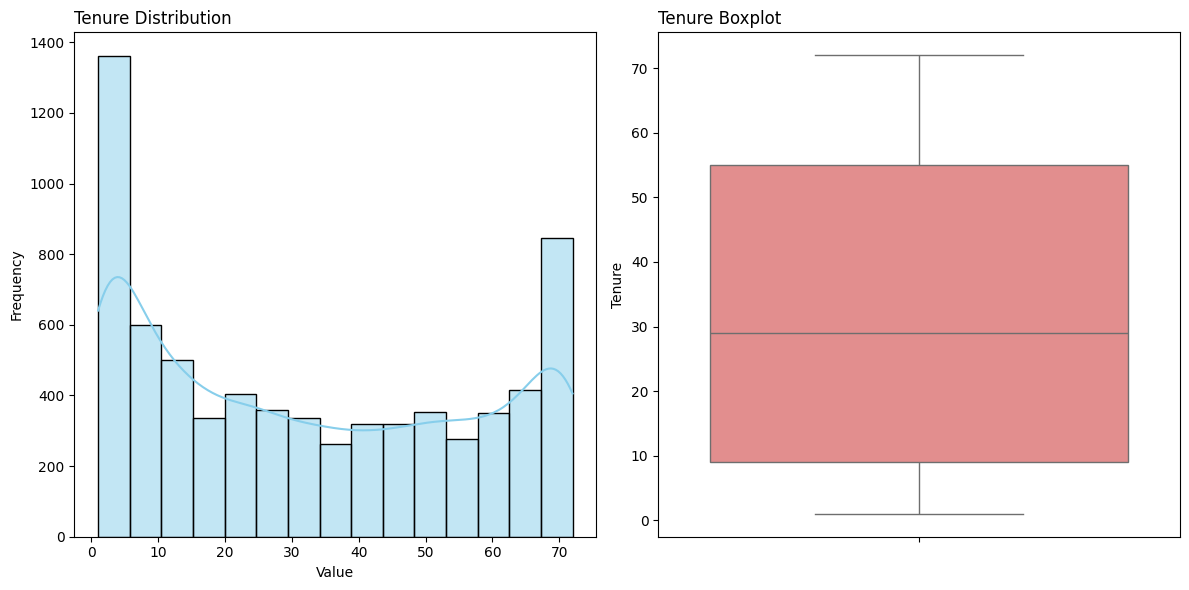

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df_dummy, x="Tenure", kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Tenure Distribution", loc="left")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

sns.boxplot(data=df_dummy, y="Tenure", ax=axes[1], color="lightcoral")
axes[1].set_title("Tenure Boxplot", loc="left")

plt.tight_layout()
plt.show();

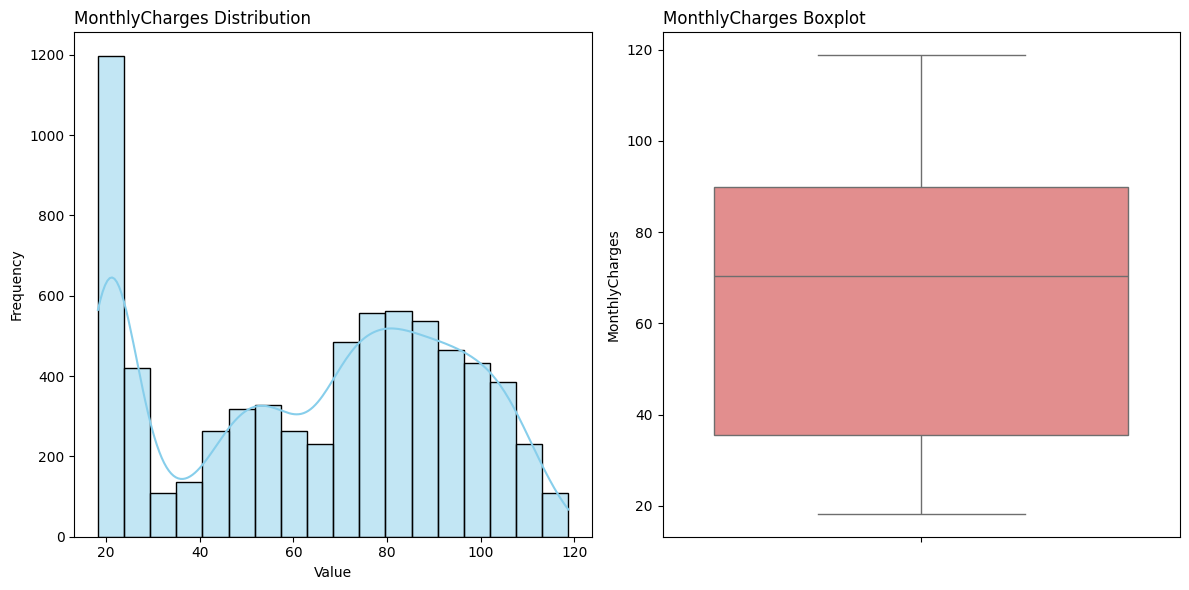

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df_dummy, x="MonthlyCharges", kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("MonthlyCharges Distribution", loc="left")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

sns.boxplot(data=df_dummy, y="MonthlyCharges", ax=axes[1], color="lightcoral")
axes[1].set_title("MonthlyCharges Boxplot", loc="left")

plt.tight_layout()
plt.show();

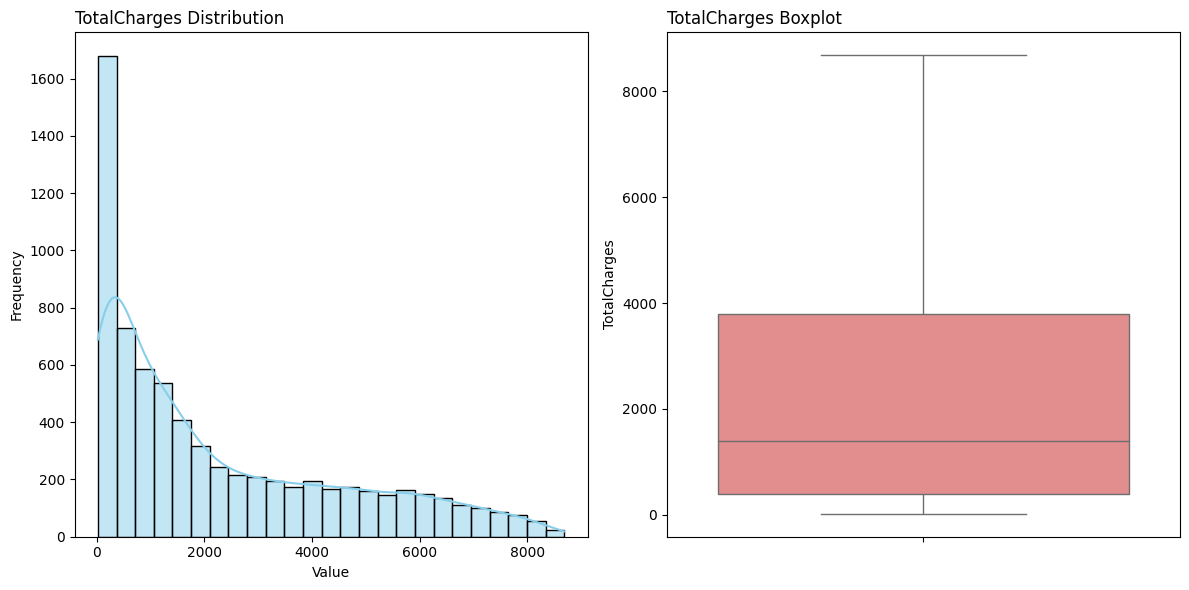

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df_dummy, x="TotalCharges", kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("TotalCharges Distribution", loc="left")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

sns.boxplot(data=df_dummy, y="TotalCharges", ax=axes[1], color="lightcoral")
axes[1].set_title("TotalCharges Boxplot", loc="left")

plt.tight_layout()
plt.show();

In [103]:
df_dummy_temp = pd.get_dummies(data=df.drop(["customerID", "Churn"], axis=1), dtype=int, drop_first=True)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_dummy_temp.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummy_temp.values, i) for i in range(df_dummy_temp.shape[1])]

vif_data

,Feature,VIF
0,SeniorCitizen,1.372809
1,Tenure,19.961285
2,MonthlyCharges,211.407548
3,TotalCharges,20.975890
4,Gender_Male,2.021273
5,Partner_Yes,2.822596
6,Dependents_Yes,1.967383
7,PhoneService_Yes,47.183952
8,MultipleLines_Yes,2.843424
9,InternetService_Fiber optic,17.342421


Variables with high level of multicolinearity. I'll try dropping some variables with high values to evaluate if the VIF reduces

In [104]:
test_cols_drop = ["customerID", "Churn", "MonthlyCharges", "Tenure"]
df_dummy_temp = pd.get_dummies(data=df.drop(test_cols_drop, axis=1), dtype=int, drop_first=True)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_dummy_temp.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummy_temp.values, i) for i in range(df_dummy_temp.shape[1])]

vif_data

,Feature,VIF
0,SeniorCitizen,1.352379
1,TotalCharges,7.948890
2,Gender_Male,1.923930
3,Partner_Yes,2.747944
4,Dependents_Yes,1.959154
5,PhoneService_Yes,9.229601
6,MultipleLines_Yes,2.504991
7,InternetService_Fiber optic,3.858821
8,InternetService_No,3.173177
9,OnlineSecurity_Yes,1.980164


There was a good reduction of VIF on the remaining variables. Let's proceed with these to the model

Checking data Balancing

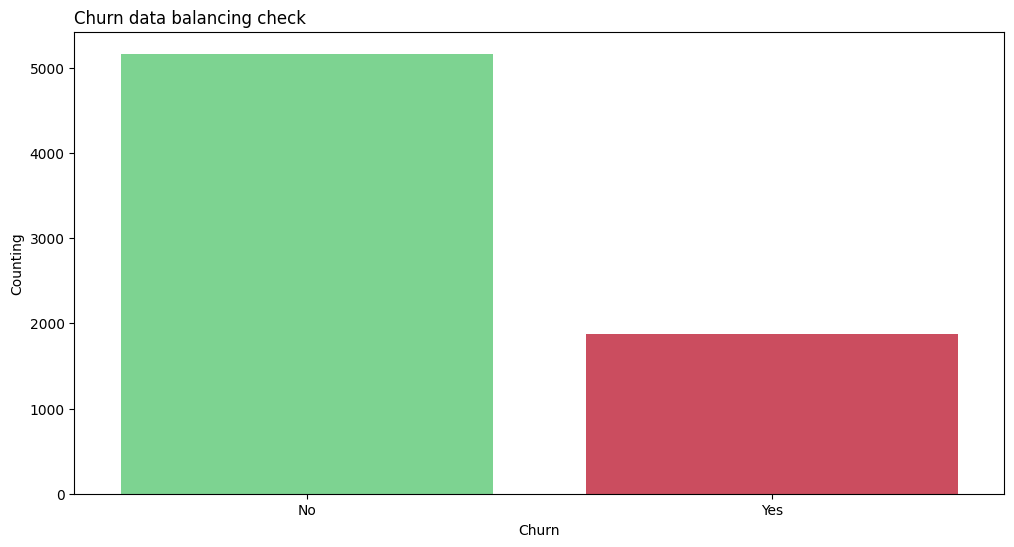

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Churn", hue="Churn", palette={"Yes": "#E03850", "No": "#6FE189"})
plt.title("Churn data balancing check", loc="left")
plt.ylabel("Counting")
plt.show();

In [106]:
balance_analysis = pd.DataFrame(
    [df["Churn"].value_counts().to_dict()]
).T.rename(columns={0: "count"})

balance_analysis["percent"] = (balance_analysis["count"] / balance_analysis["count"].sum()) * 100
balance_analysis

,count,percent
No,5163,73.421502
Yes,1869,26.578498


In [107]:
df["Churn"] = df["Churn"].apply(
    lambda x: 1 if x=="Yes" else 0
)

In [108]:
sampler = SMOTE()
data_smote = sampler.fit_resample(df_dummy, df["Churn"])

X_smote = data_smote[0]
y_smote = data_smote[1]

Separate data into X, y, Train and Test

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

print("Independent DF for Training:", X_train.shape)
print("Independent DF for Testing:", X_test.shape)
print("\nDependent DF for Training:", y_train.shape)
print("Dependent DF for Testing:", y_test.shape)

Independent DF for Training: (8260, 37)
Independent DF for Testing: (2066, 37)

Dependent DF for Training: (8260,)
Dependent DF for Testing: (2066,)


In [110]:
def compute_statistics(series: pd.Series):
    data = np.array(series).astype(float)
    
    stats = {
        "mean": np.mean(data),
        "median": np.median(data),
        "std": np.std(data, ddof=1),
        "skewness": skew(data, bias=False),
        "kurtosis": kurtosis(data, bias=False)
    }

    return stats

In [111]:
def get_variable_dist(df: pd.DataFrame):
    mlflow.set_tracking_uri("http://localhost:5000")
    mlflow.set_experiment("Data Drift Monitor")

    for col in df.columns:
        with mlflow.start_run(run_name=f"drift_{datetime.today()}"):
            ## Creating IMAGE
            img_path = f"../data/image/{col}.png"

            _, axes = plt.subplots(1, 2, figsize=(12, 6))
            sns.histplot(data=df, x=f"{col}", kde=True, ax=axes[0], color="skyblue")
            axes[0].set_title(f"{col} Distribution", loc="left")
            axes[0].set_xlabel("Value")
            axes[0].set_ylabel("Frequency")

            sns.boxplot(data=df, y=f"{col}", ax=axes[1], color="lightcoral")
            axes[1].set_title(f"{col} Boxplot", loc="left")

            plt.savefig(img_path)
            plt.close()

            ## Creating Statistics
            stats = compute_statistics(df[col])

            mlflow.set_tag(key="table_column", value=col)
            mlflow.log_artifact(img_path, artifact_path=f"plots")
            mlflow.log_metric(key="mean", value=stats["mean"])
            mlflow.log_metric(key="median", value=stats["median"])
            mlflow.log_metric(key="std", value=stats["std"])
            mlflow.log_metric(key="skewness", value=stats["skewness"])
            mlflow.log_metric(key="kurtosis", value=stats["kurtosis"])

In [112]:
get_variable_dist(df_dummy)

🏃 View run drift_2025-10-26 17:06:22.464800 at: http://localhost:5000/#/experiments/540392006916120203/runs/d4276e8ff603498aa7df742aca1d2f31
🧪 View experiment at: http://localhost:5000/#/experiments/540392006916120203
🏃 View run drift_2025-10-26 17:06:22.812094 at: http://localhost:5000/#/experiments/540392006916120203/runs/8ee86301ebc6472da69226e6826760fb
🧪 View experiment at: http://localhost:5000/#/experiments/540392006916120203
🏃 View run drift_2025-10-26 17:06:23.182170 at: http://localhost:5000/#/experiments/540392006916120203/runs/b0abd5303a544a6992863a69dc083b63
🧪 View experiment at: http://localhost:5000/#/experiments/540392006916120203
🏃 View run drift_2025-10-26 17:06:23.531405 at: http://localhost:5000/#/experiments/540392006916120203/runs/d88ea2d3b68946269d85fbfed65e2892
🧪 View experiment at: http://localhost:5000/#/experiments/540392006916120203
🏃 View run drift_2025-10-26 17:06:23.881908 at: http://localhost:5000/#/experiments/540392006916120203/runs/69ef2f71a80c424e8f36

## Model

Measuring model performance:<br>

But, which metrics should I use?<br>

Erro Tipo I (α) — Falso Positivo
Ocorre quando o modelo detecta algo que não existe.

Em termos estatísticos: rejeita a hipótese nula quando ela é verdadeira.

Na matriz: corresponde ao FP (False Positive).

In [113]:
def quantify_model_prediction(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return precision, conf_matrix

In [114]:
def save_model_on_blob(model, model_name):
    blob_path = "../models/"

    # model_name = type(model).__name__

    deep_learning_models = ["Sequential"]
    if model_name in deep_learning_models:
        model_file = f"{model_name}_{datetime.today().strftime("%Y%m%d_%H%M%S")}.keras"
        model_path = os.path.join(blob_path, model_file)

        model.save(model_path)
        print("Deep Learning model saved successfully.")
    else:
        model_file = f"{model_name}_{datetime.today().strftime("%Y%m%d_%H%M%S")}.pkl"
        model_path = os.path.join(blob_path, model_file)

        with open(model_path, "wb") as f:
            pickle.dump(obj=model, file=f)
        print("Machine Learning model saved successfully.")

    return model_path

In [115]:
def register_model_on_model_registry(model_name):
    run = mlflow.active_run()
    model_uri = f"runs:/{run.info.run_id}/model"

    registered_model = mlflow.register_model(
        model_uri=model_uri,
        name=model_name
    )

    print("Registered Model:", registered_model.name)

In [116]:
def register_model_experiment(model_name: str, y_true, y_pred, type: str, model_object): # Aqui não é um path, aqui deve ser um objeto modelo. Alterar depois
    deep_learning_models = ["Sequential"]
    recall, _ = quantify_model_prediction(y_true, y_pred)

    mlflow.set_tracking_uri("http://localhost:5000")
    mlflow.set_experiment("Churn Model Experiment")

    with mlflow.start_run(run_name=f"{model_name}_{datetime.today()}"):
        mlflow.log_metric(key="precision", value=recall)
        mlflow.set_tag(key="Type", value=type)

        if model_name in deep_learning_models:
            try:
                mlflow.keras.log_model(model=model_object, artifact_path="model", registered_model_name=model_name)
            except:
                pass
        else:
            try:
                mlflow.sklearn.log_model(sk_model=model_object, artifact_path="model", registered_model_name=model_name)
            except:
                pass

        if type == "Test":
            register_model_on_model_registry(model_name)

### Modeling

In [117]:
base_model = Logit(y_train, X_train) # Using the standard parameters
base_model = base_model.fit()

base_model_response = base_model.predict(X_train)

Optimization terminated successfully.
         Current function value: 0.310521
         Iterations 10


In [118]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8260
Model:                          Logit   Df Residuals:                     8223
Method:                           MLE   Df Model:                           36
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.5520
Time:                        17:06:36   Log-Likelihood:                -2564.9
converged:                       True   LL-Null:                       -5725.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
SeniorCitizen                               0.0473      0.095      0.498      0.618      -0.139       0.233
Tenure                                     -0.0715      0.007    -10.425      0.000      -0.085      -0.058
MonthlyCharges                              0.3445      0.020     17.582      0.000       0.306       0.383
TotalCharges                                0.0005   7.75e-05      5.855      0.000       0.000       0.001
Gender_Female                              -2.5061      0.405     -6.195      0.000      -3.299      -1.713
Gender_Male                                -2.5362      0.405     -6.267      0.000      -3.329      -1.743
Partner_No                                 -1.9919      0.412     -4.837      0.000      -2.799      -1.185
Partner_Yes                                -2.0407      0.415     -4.921      0.000      -2.854      -1.228
Dependents_No                              -1.8359      0.459     -3.996      0.000      -2.736      -0.935
Dependents_Yes                             -2.1217      0.465     -4.558      0.000      -3.034      -1.209
PhoneService_No                             2.0146      0.905      2.227      0.026       0.242       3.788
PhoneService_Yes                           -5.5048      0.918     -5.997      0.000      -7.304      -3.706
MultipleLines_No                           -0.3998      0.443     -0.903      0.366      -1.267       0.468
MultipleLines_Yes                          -1.9270      0.454     -4.244      0.000      -2.817      -1.037
InternetService_DSL                        -0.9873      1.023     -0.965      0.335      -2.993       1.019
InternetService_Fiber optic                -8.7494      1.255     -6.973      0.000     -11.209      -6.290
InternetService_No                          7.0510      1.006      7.010      0.000       5.079       9.023
OnlineSecurity_No                           0.1935      0.438      0.442      0.658      -0.664       1.051
OnlineSecurity_Yes                         -2.0584      0.463     -4.448      0.000      -2.965      -1.151
OnlineBackup_No                            -0.3827      0.421     -0.908      0.364      -1.209       0.443
OnlineBackup_Yes                           -2.3624      0.436     -5.419      0.000      -3.217      -1.508
DeviceProtection_No                         0.1692      0.428      0.396      0.692      -0.669       1.007
DeviceProtection_Yes                       -1.6758      0.439     -3.814      0.000      -2.537      -0.815
TechSupport_No                              0.3130      0.453      0.690      0.490      -0.576       1.202
TechSupport_Yes                            -1.9337      0.468     -4.132      0.000      -2.851      -1.016
StreamingTV_No                              1.7266      0.477      3.618      0.000       0.791       2.662
StreamingTV_Yes                            -1.5743      0.487     -3.232      0.001      -2.529      -0.620
S

In [119]:
cols_to_drop = [
    "SeniorCitizen",
    "MultipleLines_No",
    "InternetService_DSL",
    "OnlineSecurity_No",
    "OnlineBackup_No",
    "DeviceProtection_No",
    "TechSupport_No",
    "StreamingMovies_No",
    "Contract_Monthly"
]

base_model = Logit(y_train, X_train.drop(cols_to_drop, axis=1)) # Using the standard parameters
base_model = base_model.fit()

base_model_response = base_model.predict(X_train.drop(cols_to_drop, axis=1))

base_model.summary()

Optimization terminated successfully.
         Current function value: 0.311043
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8260
Model:                          Logit   Df Residuals:                     8232
Method:                           MLE   Df Model:                           27
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.5513
Time:                        17:06:36   Log-Likelihood:                -2569.2
converged:                       True   LL-Null:                       -5725.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Tenure                                     -0.0708      0.007    -10.402      0.000      -0.084      -0.057
MonthlyCharges                              0.3440      0.019     17.945      0.000       0.306       0.382
TotalCharges                                0.0005    7.7e-05      5.856      0.000       0.000       0.001
Gender_Female                              -2.4010      0.379     -6.336      0.000      -3.144      -1.658
Gender_Male                                -2.4323      0.379     -6.414      0.000      -3.176      -1.689
Partner_No                                 -2.0358      0.395     -5.156      0.000      -2.810      -1.262
Partner_Yes                                -2.0816      0.397     -5.238      0.000      -2.861      -1.303
Dependents_No                              -1.7243      0.425     -4.060      0.000      -2.557      -0.892
Dependents_Yes                             -2.0174      0.431     -4.682      0.000      -2.862      -1.173
PhoneService_No                             1.0792      0.503      2.146      0.032       0.093       2.065
PhoneService_Yes                           -6.4199      0.690     -9.303      0.000      -7.772      -5.067
MultipleLines_Yes                          -1.5317      0.127    -12.064      0.000      -1.781      -1.283
InternetService_Fiber optic                -7.7451      0.485    -15.983      0.000      -8.695      -6.795
InternetService_No                          8.0241      0.502     15.989      0.000       7.041       9.008
OnlineSecurity_Yes                         -2.2542      0.133    -16.958      0.000      -2.515      -1.994
OnlineBackup_Yes                           -1.9808      0.127    -15.618      0.000      -2.229      -1.732
DeviceProtection_Yes                       -1.8441      0.131    -14.094      0.000      -2.101      -1.588
TechSupport_Yes                            -2.2438      0.135    -16.576      0.000      -2.509      -1.978
StreamingTV_No                              2.0399      0.402      5.080      0.000       1.253       2.827
StreamingTV_Yes                            -1.2646      0.409     -3.088      0.002      -2.067      -0.462
StreamingMovies_Yes                        -3.2588      0.211    -15.476      0.000      -3.672      -2.846
Contract_One year                          -0.9007      0.121     -7.446      0.000      -1.138      -0.664
Contract_Two year                          -1.5656      0.200     -7.818      0.000      -1.958      -1.173
PaperlessBilling_No                        -2.4782      0.419     -5.916      0.000      -3.299      -1.657
PaperlessBilling_Yes                       -2.0075      0.416     -4.827      0.000      -2.823      -1.192
PaymentMethod_Bank transfer (automatic)    -2.7726      0.410     -6.762      0.000      -3.576      -1.969
PaymentMethod_Credit card (automatic)      -2.8665      0.411     -6.966      0.000      -3.673      -2.060
P

In [120]:
model_params = {
    "LogisticRegression":{
        "penalty":["l1", "l2", "elasticnet", None],
        "dual": [True, False],
        "tol": [1e-4, 0.001, 0.01],
    }, 
    "RandomForestClassifier":{
        "n_estimators": [10, 100, 1000],
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [10, 100, 1000],
        # "min_samples_split": [1, 2],
        # "min_samples_leaf": [1, 2],
        # "max_features": ["sqrt", "log2", None],
    }, 
    "DecisionTreeClassifier":{
        "splitter": ["best", "random"],
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [10, 100, 1000],
        # "min_samples_split": [1, 2],
        # "min_samples_leaf": [1, 2],
        # "max_features": ["sqrt", "log2", None],
    }, 
    "SVC":{
        "C": [1.0, 2.0, 3.0],
        # "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
        "degree": [3, 6 ,9],
        # "probability": [True, False],
    }, 
    "XGBClassifier":{
        "n_estimators": [1, 5, 15, 30, 60],
        "max_depth": [10, 100, 1000],
        # "max_leaves": [10, 100, 1000],
        # "learning_rate": [1e-4, 0.001, 0.01],
    }, 
}

In [121]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVC": SVC(),
    "XGBClassifier": XGBClassifier(), 
}

Training with all columns

In [122]:
for model_name in model_params:
    estimator = models[model_name]
    param_grid = model_params[model_name]

    start_training_time = datetime.now()
    print(f"\n\n>>>>>>> Training {model_name} <<<<<<")

    grid_cv = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=2
    )

    grid_cv.fit(X_train, y_train)
    # model_path = save_model_on_blob(grid_cv, model_name)

    result_prediction_train = grid_cv.predict(X_train)
    register_model_experiment(model_name, y_train, result_prediction_train, "Train", None)
    
    result_prediction_test = grid_cv.predict(X_test)
    register_model_experiment(model_name, y_test, result_prediction_test, "Test", grid_cv)
    end_training_time = datetime.now()


    training_time = end_training_time - start_training_time

    print(f">>>>>>> Finishing Training of model {model_name} in {training_time} <<<<<<")



>>>>>>> Training LogisticRegression <<<<<<


2025/10/26 17:06:37 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:06:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:06:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 3
Created version '3' of model 'LogisticRegression'.


🏃 View run LogisticRegression_2025-10-26 17:06:37.127639 at: http://localhost:5000/#/experiments/488898870833171410/runs/bcb564e89e19495482f6a6e75d7a1b8e
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:06:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:06:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 4
Created version '4' of model 'LogisticRegression'.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:06:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 5
Created version '5' of model 'LogisticRegression'.


Registered Model: LogisticRegression
🏃 View run LogisticRegression_2025-10-26 17:06:49.092333 at: http://localhost:5000/#/experiments/488898870833171410/runs/c3e42cc453af49d591d5a12ac78f87db
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model LogisticRegression in 0:00:16.193503 <<<<<<


>>>>>>> Training RandomForestClassifier <<<<<<


2025/10/26 17:08:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:08:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RandomForestClassifier'.
2025/10/26 17:08:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 1
Created version '1' of model 'RandomForestClassifier'.


🏃 View run RandomForestClassifier_2025-10-26 17:08:16.157307 at: http://localhost:5000/#/experiments/488898870833171410/runs/35b8e2ac96e24ae2bffe1bec3913dda0
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:08:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/10/26 17:08:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 2
Created version '2' of model 'RandomForestClassifier'.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/10/26 17:08:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 3
Created version '3' of model 'RandomForestClassifier'.


Registered Model: RandomForestClassifier
🏃 View run RandomForestClassifier_2025-10-26 17:08:19.149598 at: http://localhost:5000/#/experiments/488898870833171410/runs/1c63f58be2a248b990377914cf0d38ab
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model RandomForestClassifier in 0:01:31.772884 <<<<<<


>>>>>>> Training DecisionTreeClassifier <<<<<<


2025/10/26 17:08:25 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:08:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'DecisionTreeClassifier'.
2025/10/26 17:08:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 1
Created version '1' of model 'DecisionTreeClassifier'.


🏃 View run DecisionTreeClassifier_2025-10-26 17:08:24.948526 at: http://localhost:5000/#/experiments/488898870833171410/runs/e5ccee4335ea4c6b9f546e8d5bc55657
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2025/10/26 17:08:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 2
Created version '2' of model 'DecisionTreeClassifier'.
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2025/10/26 17:08:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 3
Created version '3' of model 'DecisionTreeClassifier'.


Registered Model: DecisionTreeClassifier
🏃 View run DecisionTreeClassifier_2025-10-26 17:08:27.763222 at: http://localhost:5000/#/experiments/488898870833171410/runs/f7ad4354f0a844d4864a8cec53272d35
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model DecisionTreeClassifier in 0:00:06.881609 <<<<<<


>>>>>>> Training SVC <<<<<<


2025/10/26 17:08:55 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:08:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'SVC'.
2025/10/26 17:08:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 1
Created version '1' of model 'SVC'.


🏃 View run SVC_2025-10-26 17:08:54.937127 at: http://localhost:5000/#/experiments/488898870833171410/runs/a32f9df91ef04a9f94be813d8d6ef9bb
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:09:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVC' already exists. Creating a new version of this model...
2025/10/26 17:09:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 2
Created version '2' of model 'SVC'.
Registered model 'SVC' already exists. Creating a new version of this model...
2025/10/26 17:09:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 3
Created version '3' of model 'SVC'.


Registered Model: SVC
🏃 View run SVC_2025-10-26 17:08:58.273720 at: http://localhost:5000/#/experiments/488898870833171410/runs/623eea199d114f9bb87c1020fc41780c
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model SVC in 0:00:30.660427 <<<<<<


>>>>>>> Training XGBClassifier <<<<<<


2025/10/26 17:09:04 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:09:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBClassifier'.
2025/10/26 17:09:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 1
Created version '1' of model 'XGBClassifier'.


🏃 View run XGBClassifier_2025-10-26 17:09:03.995395 at: http://localhost:5000/#/experiments/488898870833171410/runs/dbed8255c92045a7ba39a5b9cc9b2ff3
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:09:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2025/10/26 17:09:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 2
Created version '2' of model 'XGBClassifier'.
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2025/10/26 17:09:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 3


Registered Model: XGBClassifier
🏃 View run XGBClassifier_2025-10-26 17:09:06.734349 at: http://localhost:5000/#/experiments/488898870833171410/runs/afa4e33b1664427bb261406fe89d579e
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model XGBClassifier in 0:00:08.726300 <<<<<<


Created version '3' of model 'XGBClassifier'.


Training without columns with p-value >= 0.05

In [125]:
cols_to_drop = [
    "SeniorCitizen",
    "MultipleLines_No",
    "InternetService_DSL",
    "OnlineSecurity_No",
    "OnlineBackup_No",
    "DeviceProtection_No",
    "TechSupport_No",
    "StreamingMovies_No",
    "Contract_Monthly"
]

In [126]:
for model_name in model_params:
    estimator = models[model_name]
    param_grid = model_params[model_name]

    start_training_time = datetime.now()
    print(f"\n>>>>>>> Training {model_name} <<<<<<")

    grid_cv = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=2
    )

    grid_cv.fit(X_train.drop(cols_to_drop, axis=1), y_train)
    # model_path = save_model_on_blob(grid_cv, model_name)

    result_prediction_train = grid_cv.predict(X_train.drop(cols_to_drop, axis=1))
    register_model_experiment(model_name, y_train, result_prediction_train, "Train", None)
    
    result_prediction_test = grid_cv.predict(X_test.drop(cols_to_drop, axis=1))
    register_model_experiment(model_name, y_test, result_prediction_test, "Test", grid_cv)
    end_training_time = datetime.now()

    training_time = end_training_time - start_training_time

    print(f">>>>>>> Finishing Training of model {model_name} in {training_time} <<<<<<")


>>>>>>> Training LogisticRegression <<<<<<


2025/10/26 17:10:12 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:10:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:10:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 6
Created version '6' of model 'LogisticRegression'.


🏃 View run LogisticRegression_2025-10-26 17:10:12.248068 at: http://localhost:5000/#/experiments/488898870833171410/runs/613fd86c41b74bbba3c9af4dc72ee31e
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:10:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:10:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 7
Created version '7' of model 'LogisticRegression'.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/10/26 17:10:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 8
Created version '8' of model 'LogisticRegression'.


Registered Model: LogisticRegression
🏃 View run LogisticRegression_2025-10-26 17:10:14.959479 at: http://localhost:5000/#/experiments/488898870833171410/runs/d503f73bddef4ae09890157d550188e0
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model LogisticRegression in 0:00:06.752378 <<<<<<

>>>>>>> Training RandomForestClassifier <<<<<<


2025/10/26 17:11:33 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:11:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 4
Created version '4' of model 'RandomForestClassifier'.


🏃 View run RandomForestClassifier_2025-10-26 17:11:33.282708 at: http://localhost:5000/#/experiments/488898870833171410/runs/548d3ef916d34734878dfafdfdcd3956
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:11:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 5
Created version '5' of model 'RandomForestClassifier'.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 6
Created version '6' of model 'RandomForestClassifier'.


Registered Model: RandomForestClassifier
🏃 View run RandomForestClassifier_2025-10-26 17:11:36.000236 at: http://localhost:5000/#/experiments/488898870833171410/runs/a6c8870675804395bb02fb3d1e259814
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model RandomForestClassifier in 0:01:21.127859 <<<<<<

>>>>>>> Training DecisionTreeClassifier <<<<<<


2025/10/26 17:11:40 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:11:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 4
Created version '4' of model 'DecisionTreeClassifier'.


🏃 View run DecisionTreeClassifier_2025-10-26 17:11:39.955862 at: http://localhost:5000/#/experiments/488898870833171410/runs/a9231a76b0444993974b402542fe8fa9
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:11:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 5
Created version '5' of model 'DecisionTreeClassifier'.
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2025/10/26 17:11:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 6
Created version '6' of model 'DecisionTreeClassifier'.


Registered Model: DecisionTreeClassifier
🏃 View run DecisionTreeClassifier_2025-10-26 17:11:42.697396 at: http://localhost:5000/#/experiments/488898870833171410/runs/44ccfa80f96e4a929312ab02de3645c7
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model DecisionTreeClassifier in 0:00:06.624712 <<<<<<

>>>>>>> Training SVC <<<<<<


2025/10/26 17:12:10 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:12:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVC' already exists. Creating a new version of this model...
2025/10/26 17:12:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 4
Created version '4' of model 'SVC'.


🏃 View run SVC_2025-10-26 17:12:10.305193 at: http://localhost:5000/#/experiments/488898870833171410/runs/b3f49e4454ea46ebbeb3b68e4304739f
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:12:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVC' already exists. Creating a new version of this model...
2025/10/26 17:12:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 5
Created version '5' of model 'SVC'.
Registered model 'SVC' already exists. Creating a new version of this model...
2025/10/26 17:12:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVC, version 6
Created version '6' of model 'SVC'.


Registered Model: SVC
🏃 View run SVC_2025-10-26 17:12:13.794627 at: http://localhost:5000/#/experiments/488898870833171410/runs/e803d57352c34cf4997ec1a6116b725d
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model SVC in 0:00:31.028072 <<<<<<

>>>>>>> Training XGBClassifier <<<<<<


2025/10/26 17:12:18 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/26 17:12:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2025/10/26 17:12:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 4
Created version '4' of model 'XGBClassifier'.


🏃 View run XGBClassifier_2025-10-26 17:12:18.930932 at: http://localhost:5000/#/experiments/488898870833171410/runs/8a6cbe3f3bf6439fbc49676d802538a3
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


2025/10/26 17:12:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2025/10/26 17:12:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 5
Created version '5' of model 'XGBClassifier'.
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2025/10/26 17:12:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 6


Registered Model: XGBClassifier
🏃 View run XGBClassifier_2025-10-26 17:12:21.557849 at: http://localhost:5000/#/experiments/488898870833171410/runs/ced93708f5fb448ca479f558627cffdd
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410
>>>>>>> Finishing Training of model XGBClassifier in 0:00:07.979547 <<<<<<


Created version '6' of model 'XGBClassifier'.


Reducing the amount of avariables, we've got a small performance improvement during training phase for most of the models. However it does not impact on test that much. Even if it does have such impact, the training was faster. So we can proceed with with this second structure: 'Dropping unecessary columns (Statisticaly non relevant columns)'

In [127]:
model_keras_v1 = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_keras_v1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history_v1 = model_keras_v1.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6916 - loss: 8.2639 - val_accuracy: 0.7579 - val_loss: 0.5993
Epoch 2/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7523 - loss: 0.8026 - val_accuracy: 0.7542 - val_loss: 0.4977
Epoch 3/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7677 - loss: 0.6522 - val_accuracy: 0.7930 - val_loss: 0.4653
Epoch 4/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7775 - loss: 0.6548 - val_accuracy: 0.7512 - val_loss: 0.8557
Epoch 5/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.7803 - loss: 0.6484 - val_accuracy: 0.8269 - val_loss: 0.3742
Epoch 6/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7800 - loss: 0.7170 - val_accuracy: 0.8226 - val_loss: 0.4074
Epoch 7/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.7974 - loss: 0.5803 - val_accuracy: 0.7252 - val_loss: 0.7310
Epoch 8/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.7912 - loss: 0.6

In [128]:
result_keras_v1_prob = model_keras_v1.predict(X_test)
result_keras_v1 = (result_keras_v1_prob > 0.5).astype("int32")

# model_path = save_model_on_blob(model_keras_v1, type(model_keras_v1).__name__)
quantify_model_prediction(y_test, result_keras_v1)
register_model_experiment("Deep Learning_v1", y_test, result_keras_v1, "Test", grid_cv)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


2025/10/26 17:15:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Deep Learning_v1'.
2025/10/26 17:15:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v1, version 1
Created version '1' of model 'Deep Learning_v1'.
Registered model 'Deep Learning_v1' already exists. Creating a new version of this model...
2025/10/26 17:15:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v1, version 2


Registered Model: Deep Learning_v1
🏃 View run Deep Learning_v1_2025-10-26 17:15:04.462869 at: http://localhost:5000/#/experiments/488898870833171410/runs/cc940002136a4821baf269d9ea946b87
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


Created version '2' of model 'Deep Learning_v1'.


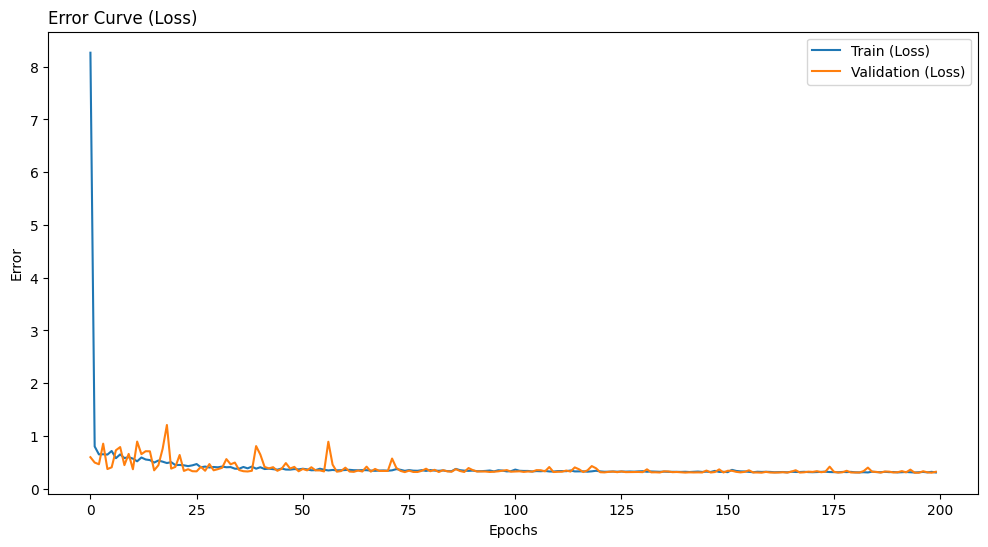

In [129]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_v1.history, y="loss", x=range(len(history_v1.history["loss"])), label='Train (Loss)')
sns.lineplot(data=history_v1.history, y="val_loss", x=range(len(history_v1.history["val_loss"])), label='Validation (Loss)')
plt.title('Error Curve (Loss)', loc="left")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show();

In [130]:
model_keras_v2 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_keras_v2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history_v2 = model_keras_v2.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7066 - loss: 2.4108 - val_accuracy: 0.7984 - val_loss: 0.4376
Epoch 2/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7538 - loss: 0.8762 - val_accuracy: 0.7984 - val_loss: 0.4585
Epoch 3/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.7576 - loss: 0.8016 - val_accuracy: 0.7742 - val_loss: 0.5631
Epoch 4/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7801 - loss: 0.5679 - val_accuracy: 0.7742 - val_loss: 0.4541
Epoch 5/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7886 - loss: 0.4994 - val_accuracy: 0.8172 - val_loss: 0.3986
Epoch 6/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7922 - loss: 0.4758 - val_accuracy: 0.8063 - val_loss: 0.4208
Epoch 7/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7780 - loss: 0.4873 - val_accuracy: 0.7984 - val_loss: 0.4197
Epoch 8/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7467 - loss: 0.5

In [131]:
result_keras_v2_prob = model_keras_v2.predict(X_test)
result_keras_v2 = (result_keras_v2_prob > 0.5).astype("int32")

# model_path = save_model_on_blob(model_keras_v2, type(model_keras_v2).__name__)
quantify_model_prediction(y_test, result_keras_v2)
register_model_experiment("Deep Learning_v2", y_test, result_keras_v2, "Test", grid_cv)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


2025/10/26 17:17:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Deep Learning_v2'.
2025/10/26 17:17:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v2, version 1
Created version '1' of model 'Deep Learning_v2'.
Registered model 'Deep Learning_v2' already exists. Creating a new version of this model...
2025/10/26 17:17:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v2, version 2


Registered Model: Deep Learning_v2
🏃 View run Deep Learning_v2_2025-10-26 17:17:50.778863 at: http://localhost:5000/#/experiments/488898870833171410/runs/5423d613bd744047ad6685cef4d82427
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


Created version '2' of model 'Deep Learning_v2'.


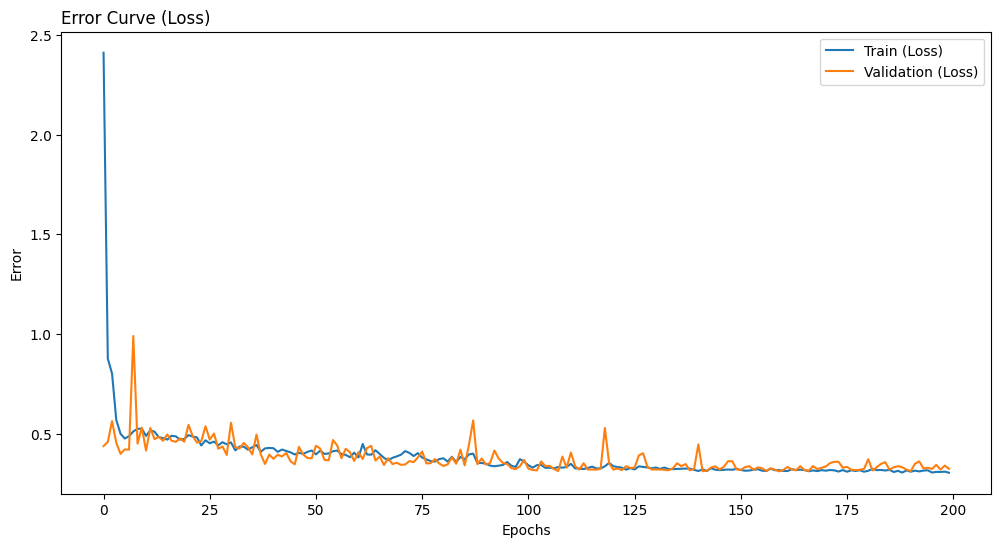

In [132]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_v2.history, y="loss", x=range(len(history_v2.history["loss"])), label='Train (Loss)')
sns.lineplot(data=history_v2.history, y="val_loss", x=range(len(history_v2.history["val_loss"])), label='Validation (Loss)')
plt.title('Error Curve (Loss)', loc="left")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show();

In [133]:
scaler = StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [134]:
model_keras_v3 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaler.shape[1],)),
    layers.Dense(12, activation='relu', input_shape=(X_train_scaler.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_keras_v3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history_v3 = model_keras_v3.fit(
    X_train_scaler, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8025 - loss: 0.4212 - val_accuracy: 0.8493 - val_loss: 0.3272
Epoch 2/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.8502 - loss: 0.3180 - val_accuracy: 0.8590 - val_loss: 0.3108
Epoch 3/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.8567 - loss: 0.3027 - val_accuracy: 0.8493 - val_loss: 0.3128
Epoch 4/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8617 - loss: 0.2968 - val_accuracy: 0.8511 - val_loss: 0.3098
Epoch 5/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.8665 - loss: 0.2899 - val_accuracy: 0.8632 - val_loss: 0.3074
Epoch 6/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8643 - loss: 0.2878 - val_accuracy: 0.8577 - val_loss: 0.3035
Epoch 7/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.8679 - loss: 0.2848 - val_accuracy: 0.8547 - val_loss: 0.3078
Epoch 8/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8671 - loss: 0.2

In [135]:
result_keras_v3_prob = model_keras_v3.predict(X_test_scaler)
result_keras_v3 = (result_keras_v3_prob > 0.5).astype("int32")

# model_path = save_model_on_blob(model_keras_v3, type(model_keras_v3).__name__)
quantify_model_prediction(y_test, result_keras_v3)
register_model_experiment("Deep Learning_v3", y_test, result_keras_v3, "Test", grid_cv)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025/10/26 17:20:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Deep Learning_v3'.
2025/10/26 17:20:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v3, version 1
Created version '1' of model 'Deep Learning_v3'.
Registered model 'Deep Learning_v3' already exists. Creating a new version of this model...
2025/10/26 17:20:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v3, version 2


Registered Model: Deep Learning_v3
🏃 View run Deep Learning_v3_2025-10-26 17:20:35.257378 at: http://localhost:5000/#/experiments/488898870833171410/runs/8dc499a80c89466397daef44f3c18d6f
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


Created version '2' of model 'Deep Learning_v3'.


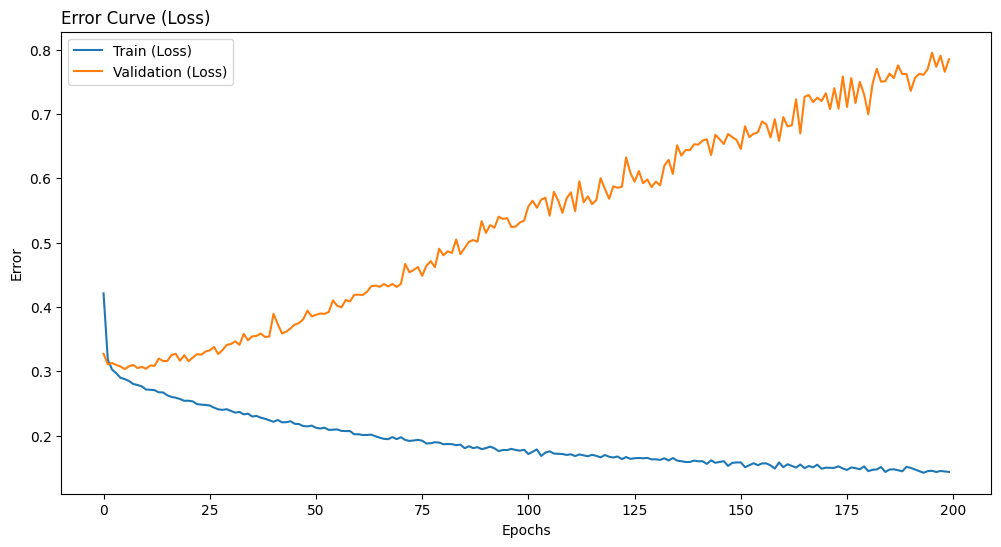

In [136]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_v3.history, y="loss", x=range(len(history_v3.history["loss"])), label='Train (Loss)')
sns.lineplot(data=history_v3.history, y="val_loss", x=range(len(history_v3.history["val_loss"])), label='Validation (Loss)')
plt.title('Error Curve (Loss)', loc="left")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show();

In [137]:
model_keras_v4 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaler.shape[1],)),
    layers.Dense(12, activation='relu', input_shape=(X_train_scaler.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_keras_v4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history_v4 = model_keras_v4.fit(
    X_train_scaler, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7551 - loss: 0.5035 - val_accuracy: 0.8366 - val_loss: 0.3508
Epoch 2/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8179 - loss: 0.3900 - val_accuracy: 0.8559 - val_loss: 0.3166
Epoch 3/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8279 - loss: 0.3816 - val_accuracy: 0.8450 - val_loss: 0.3291
Epoch 4/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.3697 - val_accuracy: 0.8584 - val_loss: 0.3170
Epoch 5/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8310 - loss: 0.3655 - val_accuracy: 0.8444 - val_loss: 0.3256
Epoch 6/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.8379 - loss: 0.3587 - val_accuracy: 0.8450 - val_loss: 0.3218
Epoch 7/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8355 - loss: 0.3470 - val_accuracy: 0.8420 - val_loss: 0.3163
Epoch 8/200
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8400 - loss: 0.3452 - val_ac

In [138]:
result_keras_v4_prob = model_keras_v4.predict(X_test_scaler)
result_keras_v4 = (result_keras_v4_prob > 0.5).astype("int32")

# model_path = save_model_on_blob(model_keras_v4, type(model_keras_v4).__name__)
quantify_model_prediction(y_test, result_keras_v4)
register_model_experiment("Deep Learning_v4", y_test, result_keras_v4, "Test", grid_cv)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025/10/26 17:23:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Deep Learning_v4'.
2025/10/26 17:23:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v4, version 1
Created version '1' of model 'Deep Learning_v4'.
Registered model 'Deep Learning_v4' already exists. Creating a new version of this model...
2025/10/26 17:23:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Deep Learning_v4, version 2


Registered Model: Deep Learning_v4
🏃 View run Deep Learning_v4_2025-10-26 17:23:52.207370 at: http://localhost:5000/#/experiments/488898870833171410/runs/d681999322254dc4a45f8c2f13169b5c
🧪 View experiment at: http://localhost:5000/#/experiments/488898870833171410


Created version '2' of model 'Deep Learning_v4'.


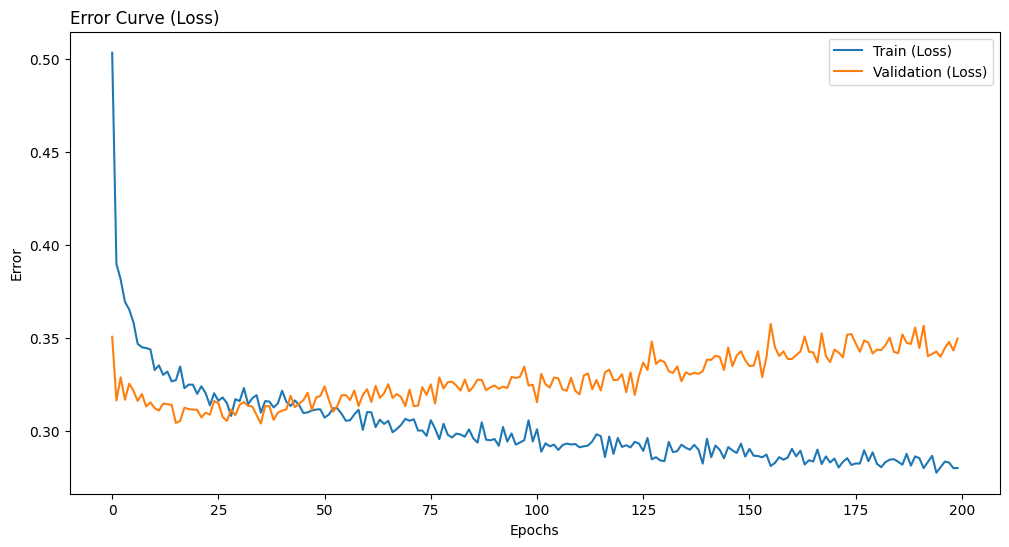

In [139]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_v4.history, y="loss", x=range(len(history_v4.history["loss"])), label='Train (Loss)')
sns.lineplot(data=history_v4.history, y="val_loss", x=range(len(history_v4.history["val_loss"])), label='Validation (Loss)')
plt.title('Error Curve (Loss)', loc="left")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show();

In [140]:
end_time = datetime.now()
delta = end_time - start_time
print(delta)

0:17:36.749542
